## DYNAMIC PRICING STRATEGY using Python

Dynamic Pricing is an application of data science that involves adjusting the prices of a product or service based on various factors in real time. It is used by companies to optimize revenue by setting flexible prices that respond to market demand, demographics, customer behaviour and competitor prices. So, if you want to learn how to build a data-driven Dynamic Pricing Strategy, this notebook is for you. In this notebook, I will take you through building a Dynamic Pricing Strategy using Python.

#### Importing the necessary libraries:

In [42]:
import pandas as pd
import numpy as np

#### Loading the dataset:

In [43]:
df = pd.read_csv("dynamic_pricing.csv")
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


#### Exploratory Data Analysis:

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [45]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [46]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

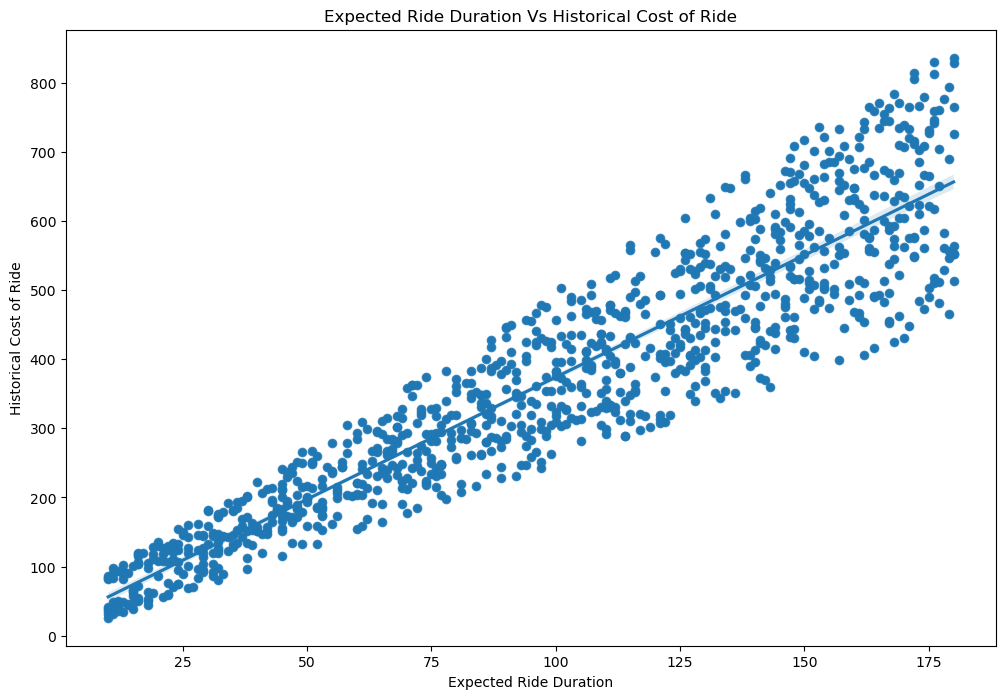

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df, 
                x = 'Expected_Ride_Duration', 
                y = 'Historical_Cost_of_Ride'
                )
sns.regplot(data = df, 
            x = 'Expected_Ride_Duration',
            y = 'Historical_Cost_of_Ride'
            )
plt.title('Expected Ride Duration Vs Historical Cost of Ride')
plt.xlabel('Expected Ride Duration')
plt.ylabel('Historical Cost of Ride')
plt.show()

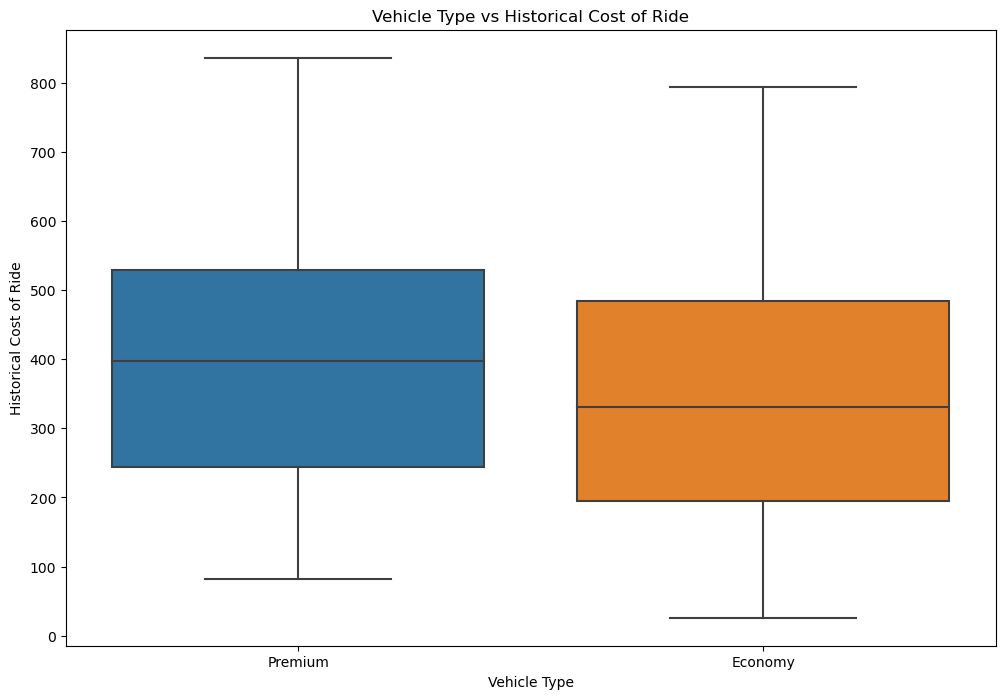

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df, 
            x = 'Vehicle_Type',
            y = 'Historical_Cost_of_Ride'
            )
plt.title('Vehicle Type vs Historical Cost of Ride')
plt.xlabel('Vehicle Type')
plt.ylabel('Historical Cost of Ride')
plt.show()

In [50]:
import warnings
warnings.filterwarnings('ignore')

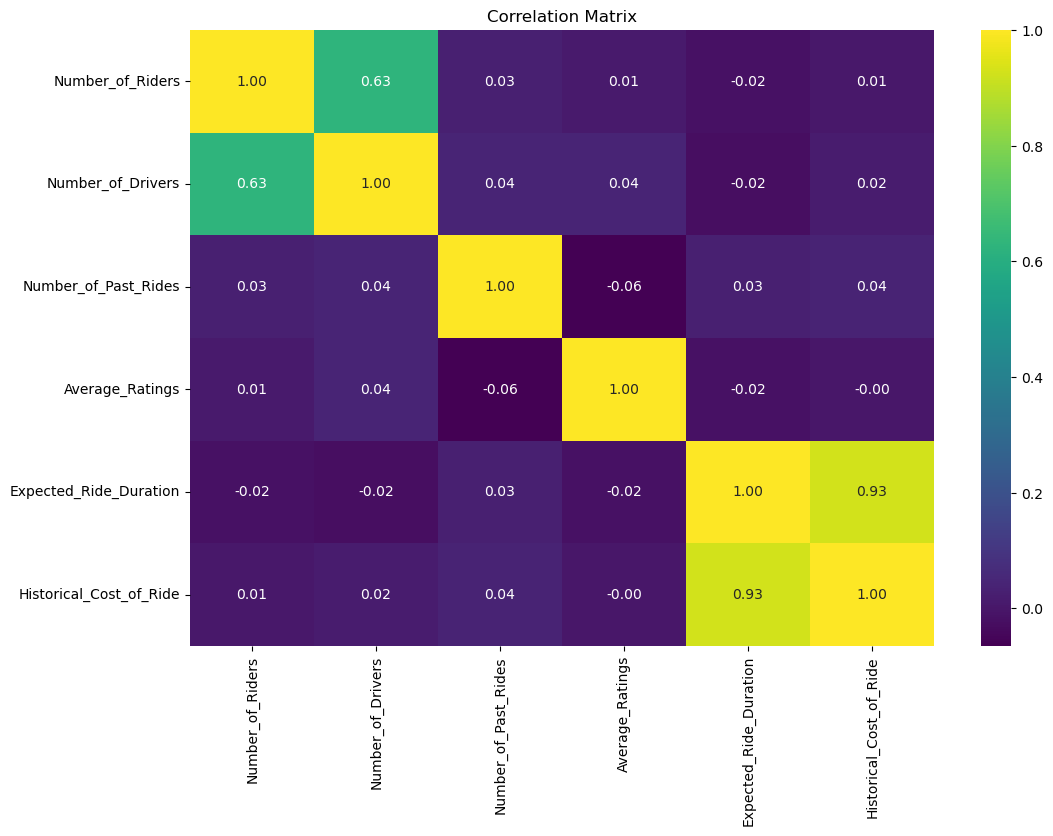

In [51]:
corr_matrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot= True, cmap= 'viridis', fmt = '.2f')

plt.title('Correlation Matrix')

plt.show()

#### Implementing a Dynamic Pricing Strategy:

In [52]:
high_demand_percentile = 75
low_demand_percentile = 25

In [53]:
df['demand_multiplier'] = np.where(df['Number_of_Drivers'] > np.percentile(df['Number_of_Drivers'], high_demand_percentile),
                                   np.percentile(df['Number_of_Drivers'],high_demand_percentile) / df['Number_of_Drivers'],
                                   np.percentile(df['Number_of_Drivers'],low_demand_percentile) / df['Number_of_Drivers'])

In [54]:
df['demand_multiplier'].head()

0    0.844444
1    0.974359
2    0.354839
3    0.392857
4    0.500000
Name: demand_multiplier, dtype: float64

In [55]:
high_supply_percentile = 75
low_supply_percentile = 25

In [56]:
df['supply_multiplier'] = np.where(df['Number_of_Drivers'] > np.percentile(df['Number_of_Drivers'],low_supply_percentile),
                                   np.percentile(df['Number_of_Drivers'], high_supply_percentile)/ df['Number_of_Drivers'],
                                   np.percentile(df['Number_of_Drivers'], low_supply_percentile) / df['Number_of_Drivers'])

In [57]:
df['supply_multiplier'].head()

0    0.844444
1    0.974359
2    1.225806
3    1.357143
4    1.727273
Name: supply_multiplier, dtype: float64

In [58]:
demand_threshold_high = 1.2
demand_threshold_low = 0.8
supply_threshold_high = 0.8
supply_threshold_low = 1.2

In [59]:
df['adjusted_ride_cost'] = df['Historical_Cost_of_Ride'] * (np.maximum(df['demand_multiplier'], demand_threshold_low)) * np.maximum(df['supply_multiplier'], supply_threshold_high)

In [60]:
df['adjusted_ride_cost'].head()

0    202.700001
1    165.072415
2    323.412331
3    510.504194
4    801.014329
Name: adjusted_ride_cost, dtype: float64

In [61]:
df['Profit Percentage'] = ((df['adjusted_ride_cost'] - df['Historical_Cost_of_Ride']) / df['Historical_Cost_of_Ride']) * 100

In [62]:
df['Profit Percentage'].head()

0   -28.691358
1    -5.062459
2    -1.935484
3     8.571429
4    38.181818
Name: Profit Percentage, dtype: float64

In [63]:
profitable_rides = df[df['Profit Percentage'] > 0]
loss_rides = df[df['Profit Percentage'] < 0]

In [64]:
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

In [65]:
labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

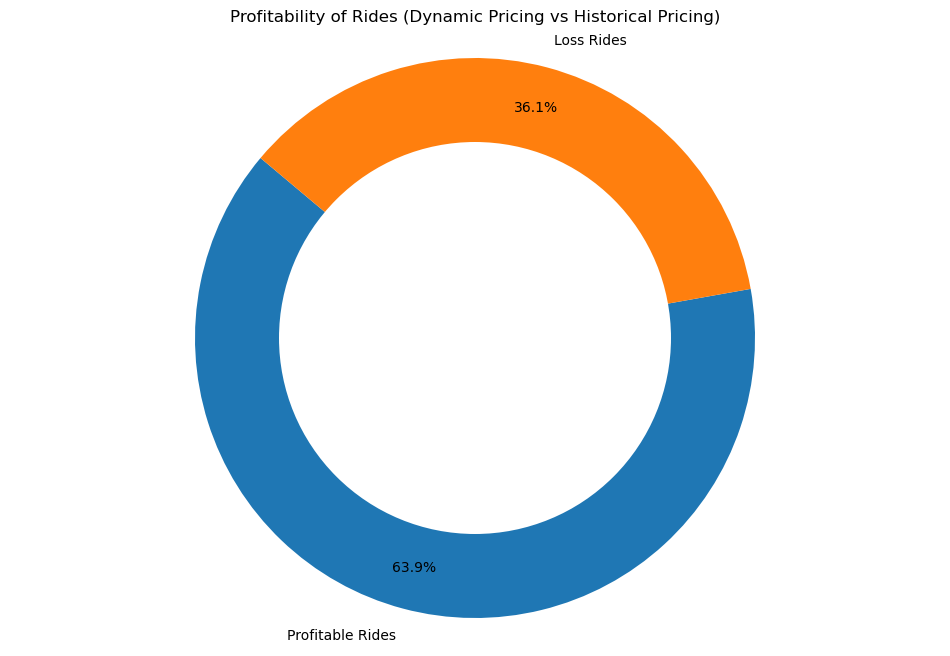

In [66]:
plt.figure(figsize=(12,8))
plt.pie(values, labels=labels, autopct= '%1.1f%%', startangle= 140, pctdistance= 0.85)
plt.title('Profitability of Rides (Dynamic Pricing vs Historical Pricing)')

centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.show()

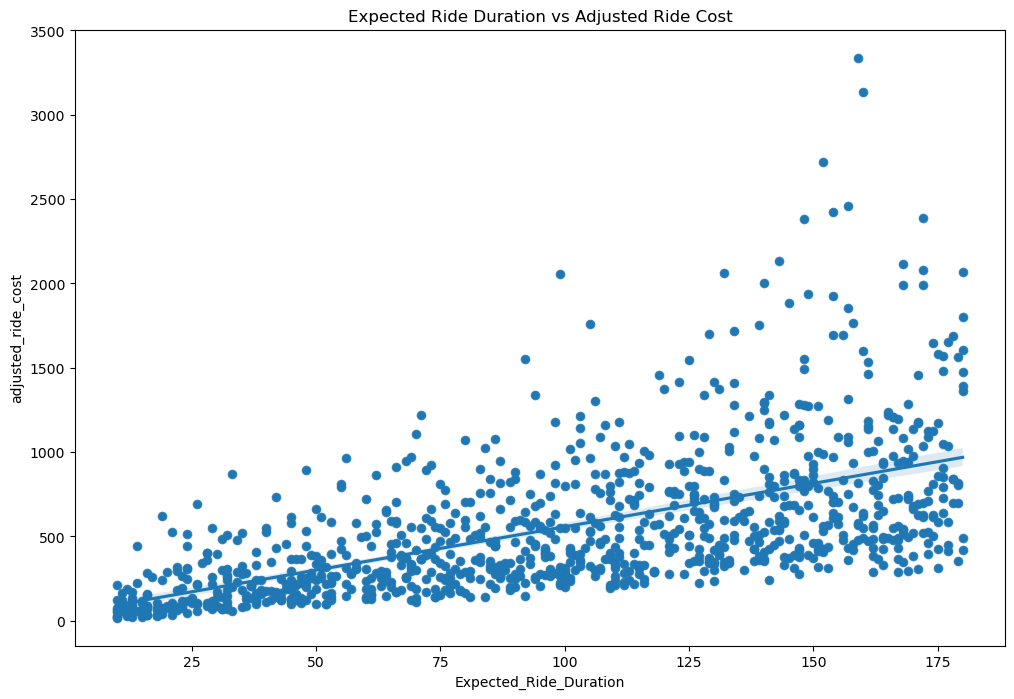

In [67]:
plt.figure(figsize= (12,8))
sns.scatterplot(data = df, x = 'Expected_Ride_Duration',
                y = 'adjusted_ride_cost',
                )

sns.regplot(data = df, x = 'Expected_Ride_Duration',
                y = 'adjusted_ride_cost',)

plt.title('Expected Ride Duration vs Adjusted Ride Cost')

plt.show()

#### Training a Predictive Model:

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
def data_preprocessing_pipeline(df):
    numeric_features = df.select_dtypes(include=['float','int']).columns
    categorical_features = df.select_dtypes(include=['object']).columns

    df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

    for feature in numeric_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound),
                                df[feature].mean(), df[feature])
        
    df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

    return df

data_preprocessing_pipeline(df)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier,supply_multiplier,adjusted_ride_cost,Profit Percentage
0,90.0,45.0,Urban,Silver,13.0,4.47,Night,Premium,90.0,284.257273,0.844444,0.844444,202.700001,-28.691358
1,58.0,39.0,Suburban,Silver,72.0,4.06,Evening,Economy,43.0,173.874753,0.974359,0.974359,165.072415,-5.062459
2,42.0,31.0,Rural,Silver,0.0,3.99,Afternoon,Premium,76.0,329.795469,0.354839,1.225806,323.412331,-1.935484
3,89.0,28.0,Rural,Regular,67.0,4.31,Afternoon,Premium,134.0,470.201232,0.392857,1.357143,510.504194,8.571429
4,78.0,22.0,Rural,Regular,74.0,3.77,Afternoon,Economy,149.0,579.681422,0.500000,1.727273,801.014329,38.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33.0,23.0,Urban,Gold,24.0,4.21,Morning,Premium,11.0,91.389526,0.478261,1.652174,120.793113,32.173913
996,84.0,29.0,Urban,Regular,92.0,4.55,Morning,Premium,94.0,424.155987,0.379310,1.310345,444.632483,4.827586
997,44.0,6.0,Suburban,Gold,80.0,4.13,Night,Premium,40.0,157.364830,0.816747,1.833333,528.920680,236.111111
998,53.0,27.0,Suburban,Regular,78.0,3.63,Night,Premium,58.0,279.095048,0.407407,1.407407,314.240351,12.592593


In [70]:
df['Vehicle_Type'] = df['Vehicle_Type'].map({'Premium': 1,
                                             'Economy': 0})

In [71]:
from sklearn.model_selection import train_test_split
x = np.array(df[['Number_of_Riders','Number_of_Drivers',
                 'Vehicle_Type','Expected_Ride_Duration']])
y = np.array(df['adjusted_ride_cost'])


In [72]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state= 42)

y_train = y_train.ravel()
y_test = y_test.ravel()

In [73]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [85]:
def get_vehicle_type_numeric(vehicle_type):
    vehicle_type_mapping = {
        "Premium": 1,
        "Economy": 0
    }
    vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
    return vehicle_type_numeric

In [86]:
def predict_price(number_of_riders, number_of_drivers, vehicle_type, Expected_Ride_Duration):
    vehicle_type_numeric = get_vehicle_type_numeric(vehicle_type)
    if vehicle_type_numeric is None:
        raise ValueError("Invalid vehicle type")
    
    input_data = np.array([[number_of_riders, number_of_drivers, vehicle_type_numeric, Expected_Ride_Duration]])
    predicted_price = model.predict(input_data)
    return predicted_price

In [87]:
user_number_of_riders = 50
user_number_of_drivers = 25
user_vehicle_type = "Economy"
Expected_Ride_Duration = 30
predicted_price = predict_price(user_number_of_riders, user_number_of_drivers, user_vehicle_type, Expected_Ride_Duration)
print("Predicted price:", predicted_price)

Predicted price: [133.89220977]


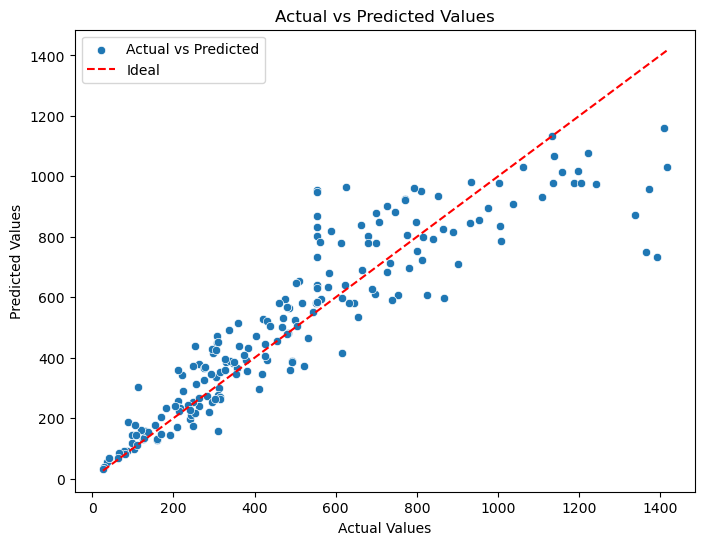

In [88]:

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred, label='Actual vs Predicted', marker='o')
plt.plot([min(y_test.flatten()), 
          max(y_test.flatten())], 
          [min(y_test.flatten()), 
           max(y_test.flatten())], 
           color='red', linestyle='--', 
           label='Ideal')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.legend()
plt.show()

## THANK YOU